# Who will benefit insurance?

## 1. Data Preprocessing & Exploration

### 1.1 Initialization

In [1]:
import numpy as np
import pandas as pd
import math

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

> All necessary Python libraries would be imported here!

### 1.2 Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [29]:
df = pd.read_csv("insurance_us.csv")
df.head()

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


We rename the colums to make the code look more consistent with its style.

In [30]:
df = df.rename(
    columns={
        "Gender": "gender",
        "Age": "age",
        "Salary": "income",
        "Family members": "family_members",
        "Insurance benefits": "insurance_benefits",
    }
)

In [31]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
78,0,43.0,34900.0,0,1
2604,0,18.0,55100.0,0,0
3897,0,25.0,23700.0,0,0
3266,1,29.0,27200.0,3,0
2340,0,42.0,52400.0,0,1
2825,0,35.0,54300.0,0,0
115,1,23.0,33000.0,1,0
1055,1,30.0,37300.0,2,0
728,0,40.0,32500.0,1,0
1178,1,18.0,58400.0,2,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [33]:
# we may want to fix the age type (from float to int) though this is not critical

# write your conversion here if you choose:
df["age"] = df["age"].astype("int")

In [34]:
# check to see that the conversion was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int32  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int32(1), int64(3)
memory usage: 175.9 KB


In [35]:
# check for the missing values
df.isna().sum()

gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
dtype: int64

In [36]:
# now have a look at the data's descriptive statistics.
# Does everything look okay?
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [37]:
# check for duplicated rows, if any
df.duplicated().sum()

153

In [38]:
# retreiev which rows were repeated
duplicates = df.duplicated(keep=False)
df.loc[duplicates].sort_values(["gender", "age", "income"]).head(10)

,gender,age,income,family_members,insurance_benefits
1751,0,19,38600.0,0,0
3268,0,19,38600.0,0,0
851,0,19,51700.0,0,0
2853,0,19,51700.0,0,0
688,0,20,35800.0,0,0
785,0,20,35800.0,0,0
1313,0,20,36800.0,0,0
2654,0,20,36800.0,0,0
3918,0,20,41500.0,2,0
4125,0,20,41500.0,2,0


In total, there were 153 rows with duplicates. However, we are not sure if they are exact duplicates or unique customers with similar parameters. Since, we don't have a customer_id column, which tells definitely if they are duplicates, for now, we decided to continue with all data (without dropping duplicates).

### 1.3 Conclusion
Data has been loaded successfully, it has 5000 rows and 5 columns. Column names have been edited for convenience. Missing values did not exist in the dataset. However, there were 153 duplicated rows. Due to, we don't have a unique ID column for each customer, we are not completely sure if these findings are duplicates or customers with similar properties. Therefore, we decided to continue without dropping the duplicated values.

## 2. EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

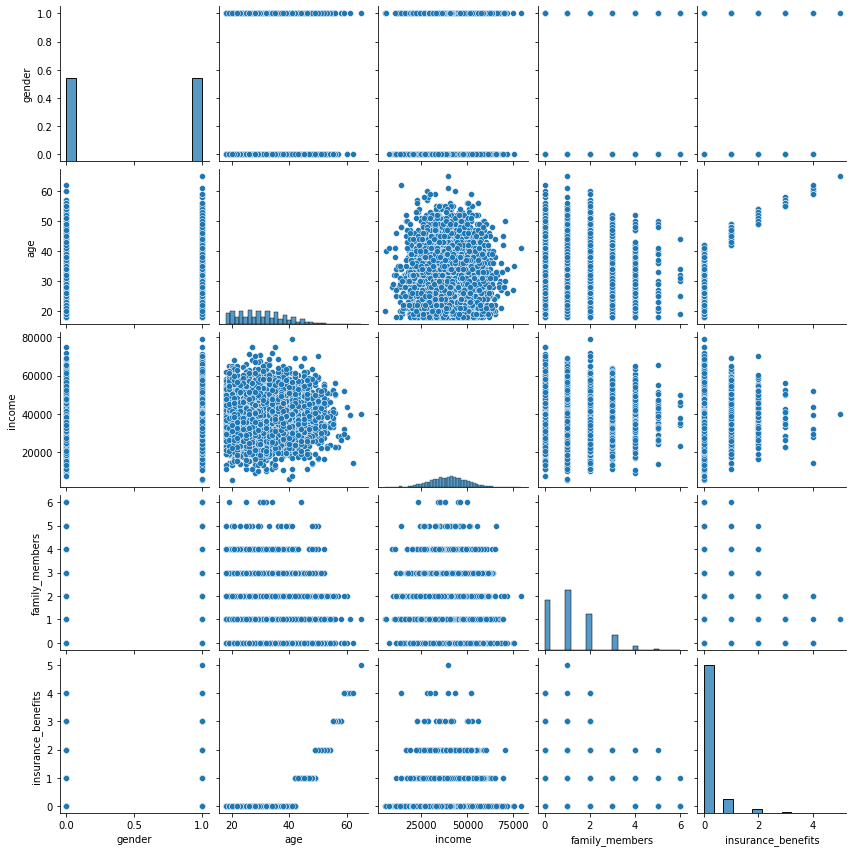

In [39]:
g = sns.pairplot(df, kind="scatter")
g.fig.set_size_inches(12, 12)

### 2.1 Conclusion
Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

## 3. Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [40]:
feature_names = ["gender", "age", "income", "family_members"]

In [41]:
def get_knn(df, n, k, metric):

    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """

    nbrs = sklearn.neighbors.NearestNeighbors(metric=metric)
    nbrs.fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors(
        [df.iloc[n][feature_names]], k, return_distance=True
    )

    df_res = pd.concat(
        [
            df.iloc[nbrs_indices[0]],
            pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=["distance"]),
        ],
        axis=1,
    )

    return df_res

Scaling the data.

In [42]:
# columns need to be scaled
feature_names = ["gender", "age", "income", "family_members"]

# fit the scaler
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

# apply the scaler
df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(
    df[feature_names].to_numpy()
)

In [43]:
# check the random 5 rows of data
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
2296,1.0,0.476923,0.381013,0.000000,0
2285,0.0,0.553846,0.673418,0.333333,0
2240,0.0,0.923077,0.353165,0.000000,4
3504,0.0,0.523077,0.344304,0.000000,0
3603,0.0,0.661538,0.434177,0.333333,1


Now, let's get similar records for a given one for every combination

In [44]:
# Use Euclidean distance with not scaled data and find 10 nearest neighbors for the 1st row
get_knn(df[feature_names], 0, 10, "euclidean")

,gender,age,income,family_members,distance
0,1,41,49600.0,1,0.000000
2022,1,41,49600.0,0,1.000000
1225,0,42,49600.0,0,1.732051
4031,1,44,49600.0,2,3.162278
3424,0,38,49600.0,0,3.316625
815,1,37,49600.0,2,4.123106
4661,0,45,49600.0,0,4.242641
2125,0,37,49600.0,2,4.242641
2349,1,46,49600.0,2,5.099020
3900,1,36,49600.0,0,5.099020


In [45]:
# Use Manhattan (city block) distance with not scaled data and find 10 nearest neighbors for the 1st row
get_knn(df[feature_names], 0, 10, "manhattan")

,gender,age,income,family_members,distance
0,1,41,49600.0,1,0.0
2022,1,41,49600.0,0,1.0
1225,0,42,49600.0,0,3.0
4031,1,44,49600.0,2,4.0
815,1,37,49600.0,2,5.0
3424,0,38,49600.0,0,5.0
2125,0,37,49600.0,2,6.0
3900,1,36,49600.0,0,6.0
2349,1,46,49600.0,2,6.0
4661,0,45,49600.0,0,6.0


In [46]:
# Use Euclidean distance with the scaled data and find 10 nearest neighbors for the 1st row
get_knn(df_scaled[feature_names], 0, 10, "euclidean")

,gender,age,income,family_members,distance
0,1.0,0.630769,0.627848,0.166667,0.000000
2689,1.0,0.630769,0.634177,0.166667,0.006329
133,1.0,0.615385,0.636709,0.166667,0.017754
4869,1.0,0.646154,0.637975,0.166667,0.018418
3275,1.0,0.646154,0.651899,0.166667,0.028550
1567,1.0,0.615385,0.602532,0.166667,0.029624
2103,1.0,0.630769,0.596203,0.166667,0.031646
3365,1.0,0.630769,0.596203,0.166667,0.031646
124,1.0,0.661538,0.635443,0.166667,0.031693
3636,1.0,0.615385,0.600000,0.166667,0.031815


In [47]:
# Use Manhattan (city block) distance with the scaled data and find 10 nearest neighbors for the 1st row
get_knn(df_scaled[feature_names], 0, 10, "manhattan")

,gender,age,income,family_members,distance
0,1.0,0.630769,0.627848,0.166667,0.000000
2689,1.0,0.630769,0.634177,0.166667,0.006329
133,1.0,0.615385,0.636709,0.166667,0.024245
4869,1.0,0.646154,0.637975,0.166667,0.025511
3365,1.0,0.630769,0.596203,0.166667,0.031646
2103,1.0,0.630769,0.596203,0.166667,0.031646
124,1.0,0.661538,0.635443,0.166667,0.038364
4305,1.0,0.630769,0.588608,0.166667,0.039241
3275,1.0,0.646154,0.651899,0.166667,0.039435
1567,1.0,0.615385,0.602532,0.166667,0.040701


Answers to the questions

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

> Yes, data scaling will strongly affect the outcome of the model. For instance, with data being not scaled, the closest distance to the 1st row was the 2022nd row (for both metrics), while for scaled data the closest one was the 2689th row.
The reason is that, features have different magnitude and during the calculation of distance (does not matter if it is Euclidean or Manhattan), numbers with different magnitudes are added up. Not-scaled data will have some columns, like salary, numbers in thousand range, while other columns, like age, are usually less than a hundred. Therefore, for distance-based algorithms scaling the data is crucial.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

> The first 3 nearest neighbors are identical for both metrics, regardless of the scaling. However, starting from the 4th one results differ a little bit.

## 4. Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [48]:
# calculate the target

df["insurance_benefits_received"] = (
    df["insurance_benefits"].map(lambda x: x > 0).astype("int")
)
df.head()

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
0,1,41,49600.0,1,0,0
1,0,46,38000.0,1,1,1
2,0,29,21000.0,0,0,0
3,0,21,41700.0,2,0,0
4,1,28,26100.0,0,0,0


In [49]:
# check for the class imbalance with value_counts()

display(df["insurance_benefits_received"].value_counts())

print(
    f"Only {564/len(df):.2%} of customers benefited from the insurance. Data is imbalanced!"
)

0    4436
1     564
Name: insurance_benefits_received, dtype: int64

Only 11.28% of customers benefited from the insurance. Data is imbalanced!


In [50]:
# function to be used to calcualte F1 score of the model and its confusion matrix
def eval_classifier(y_true, y_pred):

    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f"F1: {f1_score:.2f}")

    cm = sklearn.metrics.confusion_matrix(y_true, y_pred)
    print("Confusion Matrix")
    print(cm)

In [51]:
# generating output of a random model


def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [52]:
# check the performance of random model
for P in [0, df["insurance_benefits_received"].sum() / len(df), 0.5, 1]:

    print(f"The probability: {P:.2f}")
    y_pred_rnd = rnd_model_predict(P=P, size=len(df))

    eval_classifier(df["insurance_benefits_received"], y_pred_rnd)

    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[4436    0]
 [ 564    0]]

The probability: 0.11
F1: 0.12
Confusion Matrix
[[3957  479]
 [ 497   67]]

The probability: 0.50
F1: 0.20
Confusion Matrix
[[2280 2156]
 [ 265  299]]

The probability: 1.00
F1: 0.20
Confusion Matrix
[[   0 4436]
 [   0  564]]



The highest score the dummy model has achieved was only F1_score=0.2. This mdoel assumed all customers will benefit from the insurance, which led to very low precision (TP/(TP+FP) (too much false positive outcomes).

In [53]:
# produce feature and target columns from not-scaled data
X = df[feature_names]
y = df["insurance_benefits_received"]

# produce only feature columns from scaled data, we can use target column of not-scaled data
X_s = df_scaled[feature_names]

# Produce training and testing datasets with test_size=30%
X_train, X_test, y_train, y_test, X_s_train, X_s_test = train_test_split(
    X, y, X_s, test_size=0.3, random_state=234
)

In [54]:
# check the performance of the model using not-scaled data and k from 1 to 10
for k in range(1, 11):
    print("F1 score and confusion matrix for k=", k)
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    eval_classifier(y_test, y_pred)
    print("=" * 50)

F1 score and confusion matrix for k= 1
F1: 0.67
Confusion Matrix
[[1294   28]
 [  75  103]]
F1 score and confusion matrix for k= 2
F1: 0.37
Confusion Matrix
[[1317    5]
 [ 136   42]]
F1 score and confusion matrix for k= 3
F1: 0.38
Confusion Matrix
[[1304   18]
 [ 132   46]]
F1 score and confusion matrix for k= 4
F1: 0.22
Confusion Matrix
[[1317    5]
 [ 155   23]]
F1 score and confusion matrix for k= 5
F1: 0.23
Confusion Matrix
[[1317    5]
 [ 154   24]]
F1 score and confusion matrix for k= 6
F1: 0.11
Confusion Matrix
[[1322    0]
 [ 168   10]]
F1 score and confusion matrix for k= 7
F1: 0.13
Confusion Matrix
[[1322    0]
 [ 166   12]]
F1 score and confusion matrix for k= 8
F1: 0.03
Confusion Matrix
[[1322    0]
 [ 175    3]]
F1 score and confusion matrix for k= 9
F1: 0.04
Confusion Matrix
[[1322    0]
 [ 174    4]]
F1 score and confusion matrix for k= 10
F1: 0.03
Confusion Matrix
[[1322    0]
 [ 175    3]]


Here, a kNN classification model was trained with not-scaled data and tried to predict the number of customers who benefited from the insurance of the testing dataset. When **k=1, F1_score was 0.67**, which is comparably better than the dummy model. However, when **k was increased from 1 to 10, the F1 score decreased significantly**, and finally, at k=10 it was 0.03, which is way worse than the dummy model.

In [55]:
# check the performance of the model using the scaled data and k from 1 to 10
for k in range(1, 11):
    print("F1 score and confusion matrix for k=", k)
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    model.fit(X_s_train, y_train)
    y_pred = model.predict(X_s_test)
    eval_classifier(y_test, y_pred)
    print("=" * 50)

F1 score and confusion matrix for k= 1
F1: 0.93
Confusion Matrix
[[1317    5]
 [  19  159]]
F1 score and confusion matrix for k= 2
F1: 0.92
Confusion Matrix
[[1322    0]
 [  25  153]]
F1 score and confusion matrix for k= 3
F1: 0.92
Confusion Matrix
[[1315    7]
 [  19  159]]
F1 score and confusion matrix for k= 4
F1: 0.91
Confusion Matrix
[[1318    4]
 [  26  152]]
F1 score and confusion matrix for k= 5
F1: 0.92
Confusion Matrix
[[1315    7]
 [  21  157]]
F1 score and confusion matrix for k= 6
F1: 0.91
Confusion Matrix
[[1322    0]
 [  30  148]]
F1 score and confusion matrix for k= 7
F1: 0.92
Confusion Matrix
[[1321    1]
 [  26  152]]
F1 score and confusion matrix for k= 8
F1: 0.90
Confusion Matrix
[[1322    0]
 [  32  146]]
F1 score and confusion matrix for k= 9
F1: 0.92
Confusion Matrix
[[1321    1]
 [  27  151]]
F1 score and confusion matrix for k= 10
F1: 0.90
Confusion Matrix
[[1322    0]
 [  32  146]]


However, results were dramatically changed when features were scaled. F1 score for the model with trained data was 0.93 at k=1, this is significantly better than the dummy model or model trained with not-scaled data. Also, contrary to the previous model (which was trained with not-scaled data), here (when the model trained with scaled data) with increasing k from 1 to 10, the F1 score did not change dramatically. When k=10, the F1 score was 0.90, which is much better than the dummy and not-scaled data trained model.

Here, once more we have witnessed the importance of scaling data for a nearest-neighbor model!

## 5. Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [56]:
# linear regression class
class MyLinearRegression:
    def __init__(self):

        self.weights = None

    # fitting the model
    def fit(self, X, y):

        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = (np.linalg.inv(X2.T.dot(X2))).dot(X2.T).dot(y)

    # predicting the y
    def predict(self, X):

        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2.dot(self.weights)

        return y_pred

In [57]:
# a function to evaluate the performance of the regression model
def eval_regressor(y_true, y_pred):

    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f"RMSE: {rmse:.2f}")

    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f"R2: {r2_score:.2f}")

### 5.1 Linear regression using not-scaled data

In [58]:
X = df[["age", "gender", "income", "family_members"]].to_numpy()
y = df["insurance_benefits"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=12345
)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(
    "Weights for Linear regression model which was trained with not-scaled data:\n",
    lr.weights,
)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

Weights for Linear regression model which was trained with not-scaled data:
 [-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


### 5.2 Linear regression using not-scaled data

In [59]:
X_s = df_scaled[["age", "gender", "income", "family_members"]].to_numpy()
y_s = df_scaled["insurance_benefits"].to_numpy()

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_s, y_s, test_size=0.3, random_state=12345
)

lr = MyLinearRegression()

lr.fit(X_train_s, y_train_s)
print(
    "Weights for Linear regression model which was trained with scaled data:\n",
    lr.weights,
)

y_test_pred_s = lr.predict(X_test_s)
eval_regressor(y_test_s, y_test_pred_s)

Weights for Linear regression model which was trained with scaled data:
 [-0.94353901  2.32372069  0.01642727 -0.02059875 -0.07014128]
RMSE: 0.34
R2: 0.66


Here, a Linear regression model with scaled and not-scaled data has been benchmarked. Results show that R2 and RMSE scores are identical, meaning that data scaling did not affect the model performance for the linear regression model. The reason is, weights (*w*) have been adjusted depending on the data scale. For example, the weight for the `income` of not-scaled data was **-2.6e-07**, while it is only **-0.021** for scaled data.

## 6. Task 4. Obfuscating Data

It is best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Mupliplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [60]:
personal_info_column_list = ["gender", "age", "income", "family_members"]
df_pn = df[personal_info_column_list]

In [61]:
X = df_pn.to_numpy()

Generating a random matrix $P$.

In [62]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking the matrix $P$ is invertible

In [63]:
display(P)
np.linalg.inv(P)

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

Can you guess the customers' ages or income after the transformation?

In [64]:
# display the first 5 rows of original matrix
display(X[:5])

# transforms the original matrix by multiplying it with invertible matrix P
X_t = X.dot(P)

# display the first 5 rows of transformed matrix, compare them
X_t[:5]

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       [0.00e+00, 2.10e+01, 4.17e+04, 2.00e+00],
       [1.00e+00, 2.80e+01, 2.61e+04, 0.00e+00]])

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       [ 5345.60393712, 18803.22720286, 15479.14837264, 38663.06186284],
       [ 3347.17673462, 11782.82928336,  9699.99894205, 24211.27337753]])

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

In [65]:
X_r = X_t.dot(np.linalg.inv(P))

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [66]:
print("=" * 20, "Original matrix", "=" * 20)
print(X[:3])
print()
print("=" * 20, "Transformed matrix", "=" * 20)
print(X_t[:3])
print()
print("=" * 20, "Recovered matrix", "=" * 20)
print(X_r[:3])

==================== Original matrix ====================
[[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]]

==================== Transformed matrix ====================
[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]]

==================== Recovered matrix ====================
[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [-3.18323146e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [ 1.36424205e-12  2.90000000e+01  2.10000000e+04  0.00000000e+00]]


**You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?**


If we compare the 3rd value of the first column, we can see that for original data it is 0, but for recovered data, it is -6.23e-13, which is also almost zero. This difference arises from the precision NumPy uses when multiplying numbers.

## 7. Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

---

**Answer** to the question 

*How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above?*

---

$$w_P = [(XP)^T XP]^{-1} (XP)^T y$$
Let's expand the first product $ (XP) ^ T $

$$w_P = [P^TX^T XP]^{-1} (XP)^T y$$

Now, re-arrange inside the square bracket:
$$w_P = (P^T (X^T X)P)^{-1} (XP)^T y$$

Expand the brackets $ (P ^ T (X ^ T X) P) ^ {- 1} $:

$$
w_P = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

Since $ P $ is reversible, the product $ (P ^ T) ^ {- 1} P ^ T $ should be equal to $ E $ (an identity matrix):

$$
w_P = P^{-1} (X^T X)^{-1} E X^T y
$$

Since multiplication of any matrix with identity matrix is equal to itself:

$$
w_P = P^{-1} (X^T X)^{-1} X^T y
$$

Now the last part of the equation is exactly same as $w$, let's replace it:

$$
w_P = P^{-1} w
$$

---

**Answer** to the question 

*What would be predicted values with $w_P$?*

---

With our original $w$ calculation of target is as following:

$$
a = Xw
$$

Similar equation is applicabale for $w_P$:

$$
a' = X'w_P
$$

Here, $X' = X P$ and $w_P = P^{-1} w$, therefore:

$$
a' = X P P^{-1} w
$$

Again, $P P^{-1}$ would be equal to $E$ and then multiplication of $X$ with indentity matrix would be itself:

$$
a' = X w = a
$$

---

**Answer** to the question 

*What does that mean for the quality of linear regression if you measure it with RMSE?*

In answer to the previous question, we have shown that $a'$ would be as same as $a$, and model quality metrics (RMSE or R2) also rely on values of target (here $a$ or $a'$). Since final predicted values are same for both original and transformed datasets, we can expect identical RMSE values.

## 8. Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- Our Matrix was invertible!
- Use $XP$ as the new feature matrix

In [67]:
# Matrix P will be created using random number
rng = np.random.default_rng(seed=234)
P = rng.random(size=(X.shape[1], X.shape[1]))

np.linalg.inv(P)
print(
    "np.linalg.inv() function can run without any error for matrix $P$, that means our matrix is invertible!"
)

np.linalg.inv() function can run without any error for matrix $P$, that means our matrix is invertible!


In [68]:
personal_info_column_list = ["gender", "age", "income", "family_members"]
df_pn = df[personal_info_column_list]

X = df_pn.to_numpy()
y = df["insurance_benefits"].to_numpy()

In [69]:
# let's first split data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=234
)


# we will use the Linearregression class, which was created previously built in section 6
lr = MyLinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
eval_regressor(y_test, y_pred)

RMSE: 0.33
R2: 0.65


In [70]:
# now let's obfuscate dataset first and repeat the same steps as above
X_t = X.dot(P)

# let's first split data into training and testing sets:
X_t_train, X_t_test, y_t_train, y_t_test = train_test_split(
    X_t, y, test_size=0.3, random_state=234
)


# we will use the Linearregression class, which was created previously built in section 6
lr = MyLinearRegression()

lr.fit(X_t_train, y_t_train)
y_t_pred = lr.predict(X_t_test)
eval_regressor(y_t_test, y_t_pred)

RMSE: 0.33
R2: 0.65


We already proved mathematically that the RMSE score for original and obfuscated data should be the same, in the previous section. Indeed, here we observed that both original and obfuscated data has the same RMSE values of 0.33.

## 9. Summary

- 1 Dataset with **5000 rows and 5 columns** has been imported. For convenience, column names were changed to lower case and whitespaces have been removed. **There were not any errors** in the data (Missing values were not observed and descriptive statistics were not abnormal).

- 2 EDA has been performed, but due to the multivariate distributions, useful data were not obtained from it.

- 3 To find similar customers, a model has been developed. This model will find similar customers to provided customers. Here, it was observed that scaling of data is very important to find correct similar customers.

- 4 Using the K-nearest neighbors algorithm, a classification model has been developed, which will determine if the new customer is likely to receive insurance benefits or not. The F1 score of the model was 0.93. And it should be noted that data scaling was very important to correctly detect customers who are going to benefit from the insurance. (without data scaling F1 score was 0.67. Moreover, performance of the developed model benchmarked with a random (dummy) model and it as observed that our model was performing way more accurate than the dummy model (F1 score 0.2 vs 0.93)

- 5 Then a Linear regression model has been developed to predict exactly how many insurance benefits would a customer utilize. The developed model has not been affected by data scaling. As the result developed model has RMSE and R2 scores of 0.34 and 0.66, respectively.

- 6 Finally, to protect the sensitive personal information of customers, a data masking (data obfuscation) strategy has been developed and the correctness of the strategy has been proved mathematically. Then the developed strategy has been tested, whether it will affect the model performance or not. As the result, it was observed that model quality was resistant to the developed data obfuscation strategy.

# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>